In [69]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
def sample(sigma_me = 1.0, sigma_other = 1.0, num_other = 1, sigma_prior = 3.0, s = 10000):
    true_values  = sigma_prior * rnd.randn(s)
    my_values    = true_values + sigma_me    * rnd.randn(s)
    other_values = np.reshape(true_values, (s, 1)) + sigma_other * rnd.randn(s, num_other)
    wins         = my_values > np.amax(other_values, axis=1)
    return true_values, my_values, wins

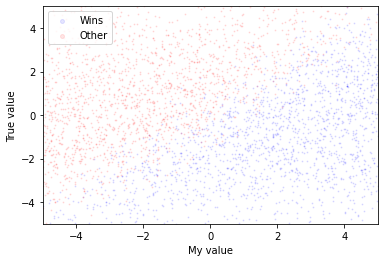

In [79]:
true_values, my_values, wins = sample(num_other = 1, sigma_other = 1.0, sigma_me = 10.0)
plt.scatter(my_values[wins], true_values[wins], s=1, c='b', alpha=0.1, label='Wins')
plt.scatter(my_values[~wins], true_values[~wins], s=1, c='r', alpha=0.1, label='Other')
plt.xlabel('My value')
plt.ylabel('True value')
plt.legend(markerscale=4)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

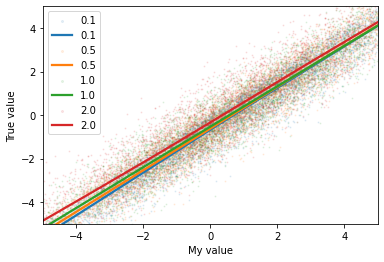

In [80]:
sigmas = [0.1, 0.5, 1.0, 2.0]
for sigma_other in sigmas:
    true_values, my_values, wins = sample(num_other = 1, sigma_me = 1.0, sigma_other = sigma_other)
    sns.regplot(x=my_values[wins], y=true_values[wins], lowess=True, scatter_kws={'alpha': 0.1, 's': 1, 'label' : str(sigma_other)})
plt.xlabel('My value')
plt.ylabel('True value')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend(labels=np.repeat(sigmas, 2).flatten(), markerscale=2)
plt.show()

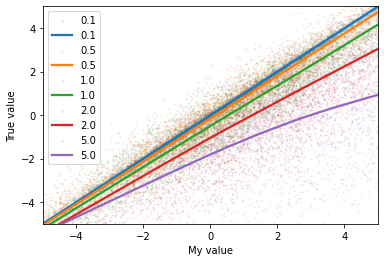

In [74]:
sigmas = [0.1, 0.5, 1.0, 2.0, 5.0]
for sigma_me in sigmas:
    true_values, my_values, wins = sample(num_other = 1, sigma_me = sigma_me, sigma_other = 1.0)
    sns.regplot(x=my_values[wins], y=true_values[wins], lowess=True, scatter_kws={'alpha': 0.1, 's': 1, 'label' : str(sigma_other)})
plt.xlabel('My value')
plt.ylabel('True value')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend(labels=np.repeat(sigmas, 2).flatten(), markerscale=2)
plt.show()

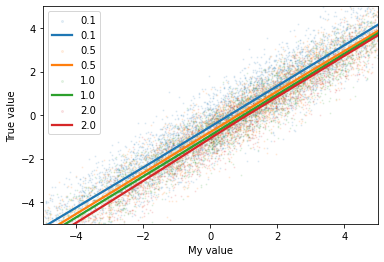

In [81]:
num_others = [1, 2, 3, 4]
for num_other in num_others:
    true_values, my_values, wins = sample(num_other = num_other, sigma_me = 1.0, sigma_other = 1.0)
    sns.regplot(x=my_values[wins], y=true_values[wins], lowess=True, scatter_kws={'alpha': 0.1, 's': 1, 'label' : str(sigma_other)})
plt.xlabel('My value')
plt.ylabel('True value')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend(labels=np.repeat(sigmas, 2).flatten(), markerscale=2)
plt.show()